In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('ghg_emissions.csv')

# Show the first 5 rows
df.head()


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.467,0.046,0.513,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.025,0.000,0.026,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,4,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.199,0.024,0.223,NaN,4,2,1,4,1


In [4]:
# Drop unnamed column if it exists
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


C:\Users\admin\AppData\Local\Temp\ipykernel_8400\435322883.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Supply Chain Emission Factors with Margins',


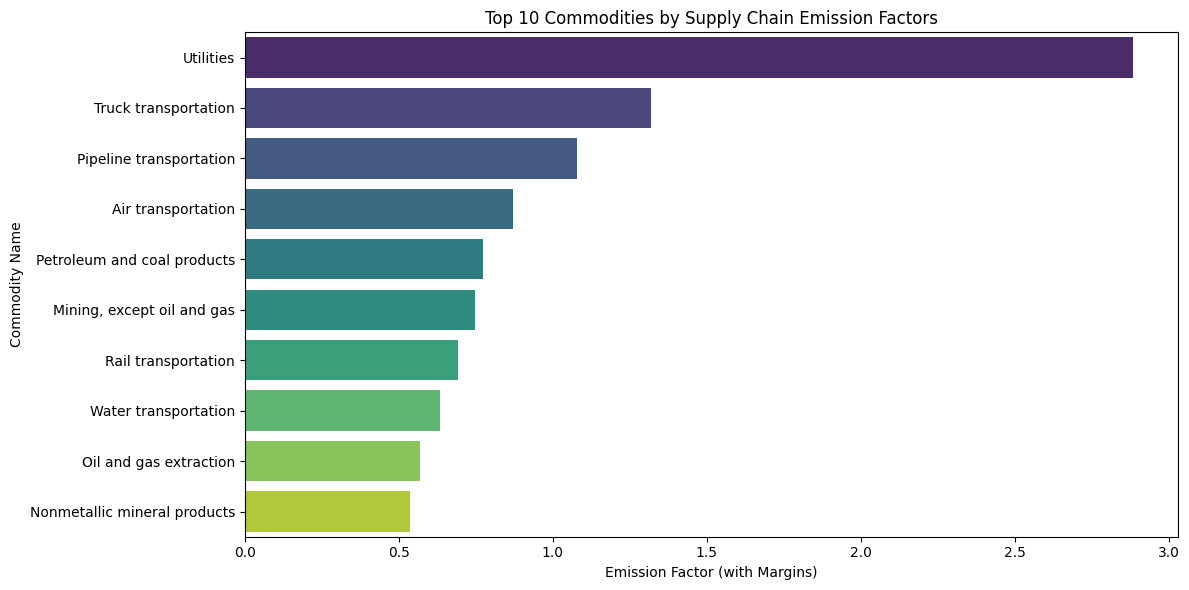

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort and select top 10
top_commodities = df[['Commodity Name', 'Supply Chain Emission Factors with Margins']] \
                    .dropna() \
                    .sort_values(by='Supply Chain Emission Factors with Margins', ascending=False) \
                    .head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Supply Chain Emission Factors with Margins', 
            y='Commodity Name', 
            data=top_commodities, palette='viridis')

plt.title('Top 10 Commodities by Supply Chain Emission Factors')
plt.xlabel('Emission Factor (with Margins)')
plt.ylabel('Commodity Name')
plt.tight_layout()
plt.show()


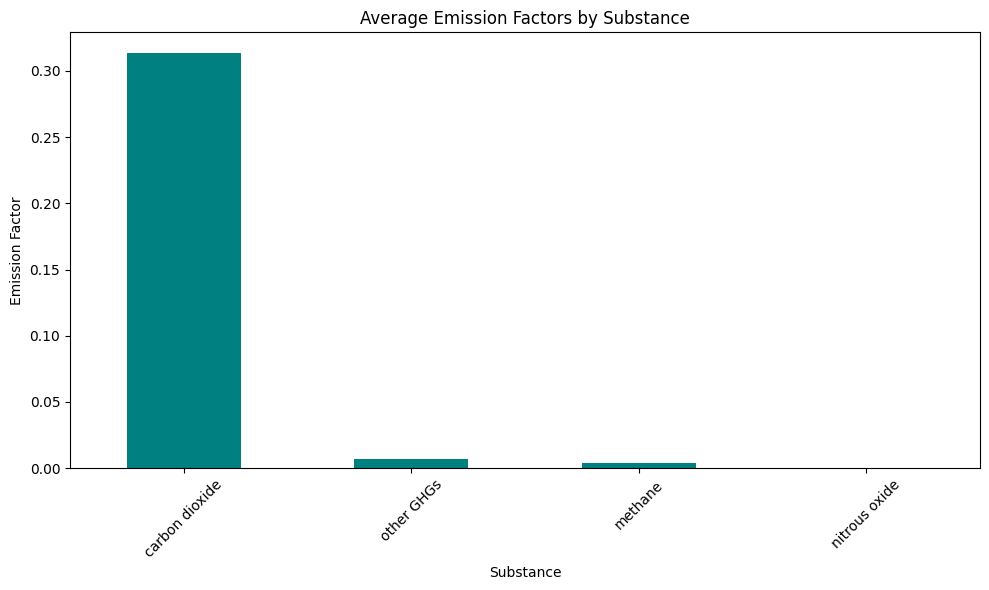

In [6]:
df_grouped = df.groupby('Substance')['Supply Chain Emission Factors with Margins'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
df_grouped.plot(kind='bar', color='teal')
plt.title('Average Emission Factors by Substance')
plt.ylabel('Emission Factor')
plt.xlabel('Substance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_8400\3506139431.py:27: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


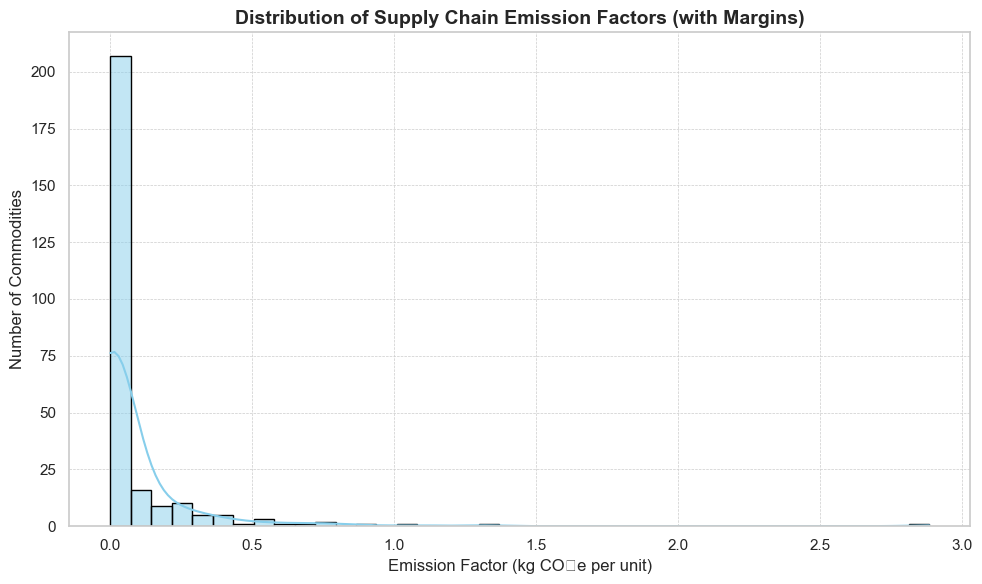

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean visual style
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# Histogram with KDE (kernel density estimate)
sns.histplot(
    df['Supply Chain Emission Factors with Margins'].dropna(), 
    bins=40, 
    kde=True, 
    color='skyblue', 
    edgecolor='black'
)

# Improve title and labels
plt.title('Distribution of Supply Chain Emission Factors (with Margins)', fontsize=14, fontweight='bold')
plt.xlabel('Emission Factor (kg CO₂e per unit)', fontsize=12)
plt.ylabel('Number of Commodities', fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Tweak layout for spacing
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
df.describe()


,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
count,264.000000,264.000000,264.000000,264.000000,264.0,264.0,264.000000,264.0
mean,0.077129,0.003992,0.081102,3.428030,2.0,1.0,2.825758,1.0
std,0.240289,0.022153,0.244245,0.560529,0.0,0.0,1.266691,0.0
min,0.000000,0.000000,0.000000,2.000000,2.0,1.0,1.000000,1.0
25%,0.000000,0.000000,0.000000,3.000000,2.0,1.0,1.000000,1.0
50%,0.002000,0.000000,0.002000,3.000000,2.0,1.0,3.000000,1.0
75%,0.043000,0.000000,0.043250,4.000000,2.0,1.0,4.000000,1.0
max,2.884000,0.305000,2.884000,4.000000,2.0,1.0,5.000000,1.0


In [ ]:
df['Substance'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title("Distribution of GHG Types in Dataset")
plt.ylabel('')
plt.tight_layout()
plt.show()
